In [5]:
from sklearn.utils import shuffle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

N = 1000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], N)
x2 = np.random.multivariate_normal([2, 5], [[1, .75],[.75, 1]], N)
sim = np.vstack((x1, x2)).astype(np.float32)

data_y = np.hstack((np.ones(N), -np.ones(N)))
data_X = np.vstack((x1, x2)).astype(np.float32)
data_X = np.hstack((np.ones((data_X.shape[0], 1)), data_X)) # intercept

data_X, data_y = shuffle(data_X, data_y, random_state = randint(0, 100))

print(data_X.shape, data_y.shape)
# plt.figure(figsize=(12,8))
# plt.scatter(data_X[:, 1], data_X[:, 2], c = data_y, alpha = .8)

(2000, 3) (2000,)


In [6]:
class Perceptron():
    def __init__(self, eta = 0.01, it=10):
        self.eta = eta # learn rate
        self.it = it # max iterations
        
    def fit(self, X, y):
        self.beta = np.zeros(X.shape[1])
        self.errors = []
        self.yhat = []
        
        for _ in range(self.it):
            err = 0
            for Xi, yi, in zip(X,y):
                yihat = self.predict(Xi)
                if(yihat*yi) <= 0:
                    err += 1 # yihat*yi
                    self.beta += self.eta * Xi * yi
            self.errors.append(err)
            
        self.yhat = self.predict(X)
            
    def predict(self, X):
        return  np.where(np.dot(X,self.beta) >= 0.0, 1, -1)

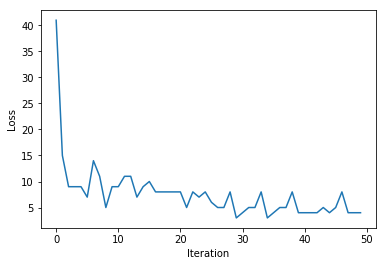

In [7]:
p = Perceptron(0.001, 50)
p.fit(data_X, data_y)

plt.plot(p.errors)
plt.xlabel('Iteration')
plt.ylabel('Loss')

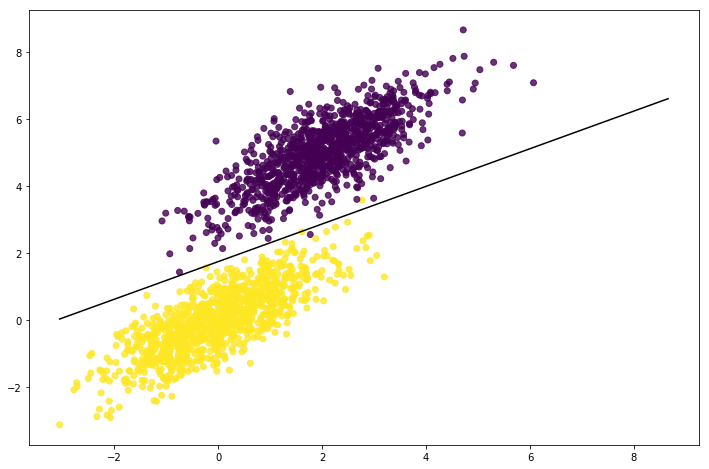

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(data_X[:, 1], data_X[:, 2], c = data_y, alpha = .8)

f = lambda x, b: (x*(-b[1])-b[0])/b[2]
x = np.array([min(data_X[:,1]),max(data_X[:,2])])
plt.plot(x, f(x,p.beta.T), marker='', color='black', linestYle='-')
